<a href="https://colab.research.google.com/github/VMBoehm/SDSS_PAE/blob/main/LSTM_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting the Density Estimator

In [1]:
## todo add forked repo as origin or upstream
## check paths
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#! pip install --user -e /global/u2/v/vboehm/codes/SIG_GIS/

In [3]:
import sys

In [4]:
sys.path.append('/global/u2/v/vboehm/codes/SIG_GIS/')

In [5]:
from sig_gis import *

In [6]:
from sig_gis.GIS import *

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [23]:
root_models     = '/global/cscratch1/sd/vboehm/Models/SDSS_AE/'

root_encoded    = '/global/cscratch1/sd/vboehm/Datasets/encoded/sdss/'
root_decoded    = '/global/cscratch1/sd/vboehm/Datasets/decoded/sdss/'
root_data       = '/global/cscratch1/sd/vboehm/Datasets'
root_model_data = '/global/cscratch1/sd/vboehm/Datasets/sdss/by_model/'

root_prepped    = os.path.join(root_data,'sdss/prepped')


label           = 'galaxies_quasars_bins1000_wl3388-8318'
label_          = label+'_minz005_maxz036_minSN50'
label_2         = label+'_minz01_maxz036_minSN50'+'_8_fully_connected_mean_div'

seed            = 8720

latent_dim      = 8
network_type    = 'fully_connected'


wlmin, wlmax    = (3388,8318)
fixed_num_bins  = 1000
wl_range      = (np.log10(wlmin),np.log10(wlmax))
# new binning 
new_wl        = np.logspace(wl_range[0],wl_range[1],fixed_num_bins+1)

alpha         = (0.8,0.8)

maxiter       = 500

label_3       = label_2+"alpha%d_maxiter%d"%(int(alpha[0]*10),maxiter)



encoded_train, encoded_valid, encoded_test = np.load(os.path.join(root_encoded,'encoded_%s.npy'%label_2), allow_pickle=True)
decoded_train, decoded_valid, decoded_test = np.load(os.path.join(root_decoded,'decoded_%s.npy'%label_2), allow_pickle=True)



seed = 8365

In [24]:
torch.manual_seed(seed)
np.random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    device = torch.device('cuda')
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    device = torch.device('cpu')

In [25]:
encoded_train = torch.tensor(encoded_train).to(device)
encoded_valid = torch.tensor(encoded_valid).to(device)

In [26]:
try:
    model =  torch.load(os.path.join(root_models,'GIS_%s'%label_3))
except:
    print('model not found')

In [27]:
#torch.save(model, 'GIS_%s_seed%d'%(label_2,seed))
model.evaluate_density(encoded_valid[0:100]).cpu()

tensor([ -7.6330,  -3.1052,  -8.0109,  -2.7521, -17.7307,   5.8963, -10.0800,
         -4.5933, -13.1432,  -9.9863,  -1.2156,  -9.2334,  -4.4022, -13.2595,
        -11.2149,  -6.7939,  -3.5571, -11.8615, -10.2169,  -3.7882,  -7.0724,
         -1.5769, -14.2238,  -4.3426,  -6.9182,   1.9477, -13.6996, -15.5552,
         -4.5648, -11.0936,  -3.5200,  -2.9471,  -8.3381, -15.4625,  -6.1721,
          2.4632,  -7.5349,  -8.7043, -12.5300, -10.8284, -11.5945, -11.6993,
         -6.4072,  -0.9558,   9.0500,  -9.1848,  -5.0499,  -9.7150,   0.4874,
         -7.5203,  -7.3842, -29.1579, -12.2225,  -8.5153,  -8.1379, -10.9563,
         -6.3271,  -8.8232, -11.7884, -20.2788,  -7.7701,  -7.0076, -10.8565,
         -7.0646, -11.7188,  -6.4422,  -5.8854,  -8.2293,  -3.9533,  -9.9123,
         -5.3087, -10.0785, -14.1312, -10.5949,  -7.4907, -11.1962,  -5.0201,
         -3.1674,  -7.8778, -13.0937,  -4.7952,  -9.6074, -13.1083,  -9.8321,
          0.1894,   5.9456, -27.0668, -17.0656,  -1.9381,  -5.84

In [16]:
valid_data = np.load(os.path.join(root_model_data,'valid_%s.npy.npz'%label_2))

In [18]:
valid_data.files

['arr_0', 'arr_1', 'arr_2', 'arr_3', 'arr_4', 'arr_5', 'arr_6', 'arr_7']

In [28]:
logps_valid = model.evaluate_density(encoded_valid).cpu()

indices = np.argsort(logps_valid)


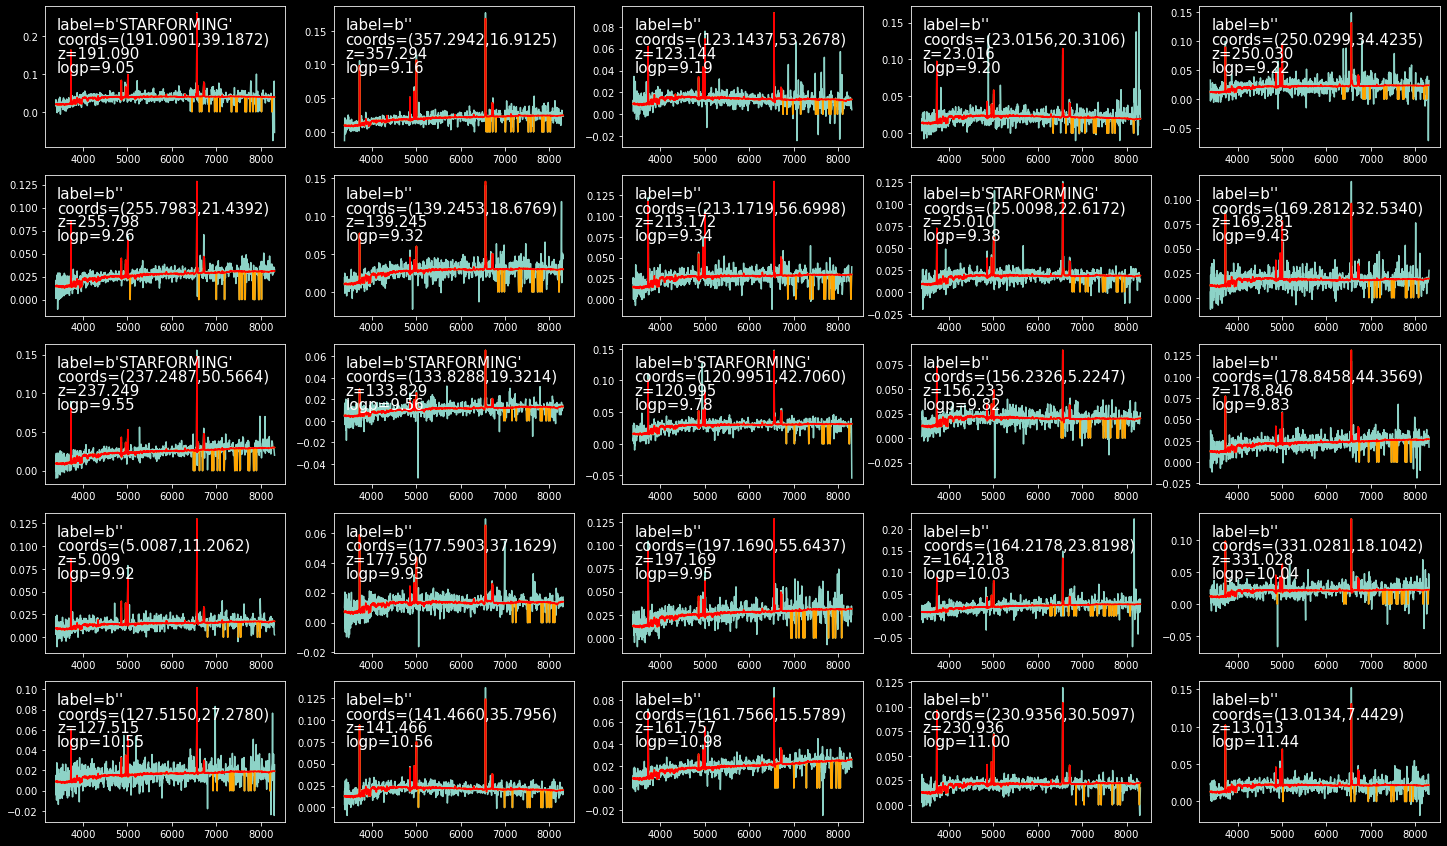

In [33]:



style_list=['dark_background']
# Plot a demonstration figure for every available style sheet.
for style_label in style_list:
    with plt.rc_context({"figure.max_open_warning": len(style_list)}):
        with plt.style.context(style_label):
            
            fig, ax = plt.subplots(5,5, figsize=(25,15))
            ax = ax.flatten()
            for nn, ii in enumerate(indices[-25::]):
                ax[nn].plot(new_wl[:-1], (np.squeeze(valid_data['arr_0'])[ii])*np.squeeze(valid_data['arr_1'])[ii], )
                ax[nn].plot(new_wl[:-1], (np.squeeze(decoded_valid)[ii])*np.squeeze(valid_data['arr_1'])[ii], color='orange')
                ax[nn].plot(new_wl[:-1], (np.squeeze(decoded_valid)[ii]), color='red')
                ax[nn].text(0.05, 0.92, r'label=%s'%valid_data['arr_7'][ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.82, r'coords=(%.4f,%.4f)'%(valid_data['arr_4'][ii],valid_data['arr_5'][ii]), fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.72, r'z=%.3f'%valid_data['arr_4'][ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.62, r'logp=%.2f'%logps_valid[ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)

plt.show()

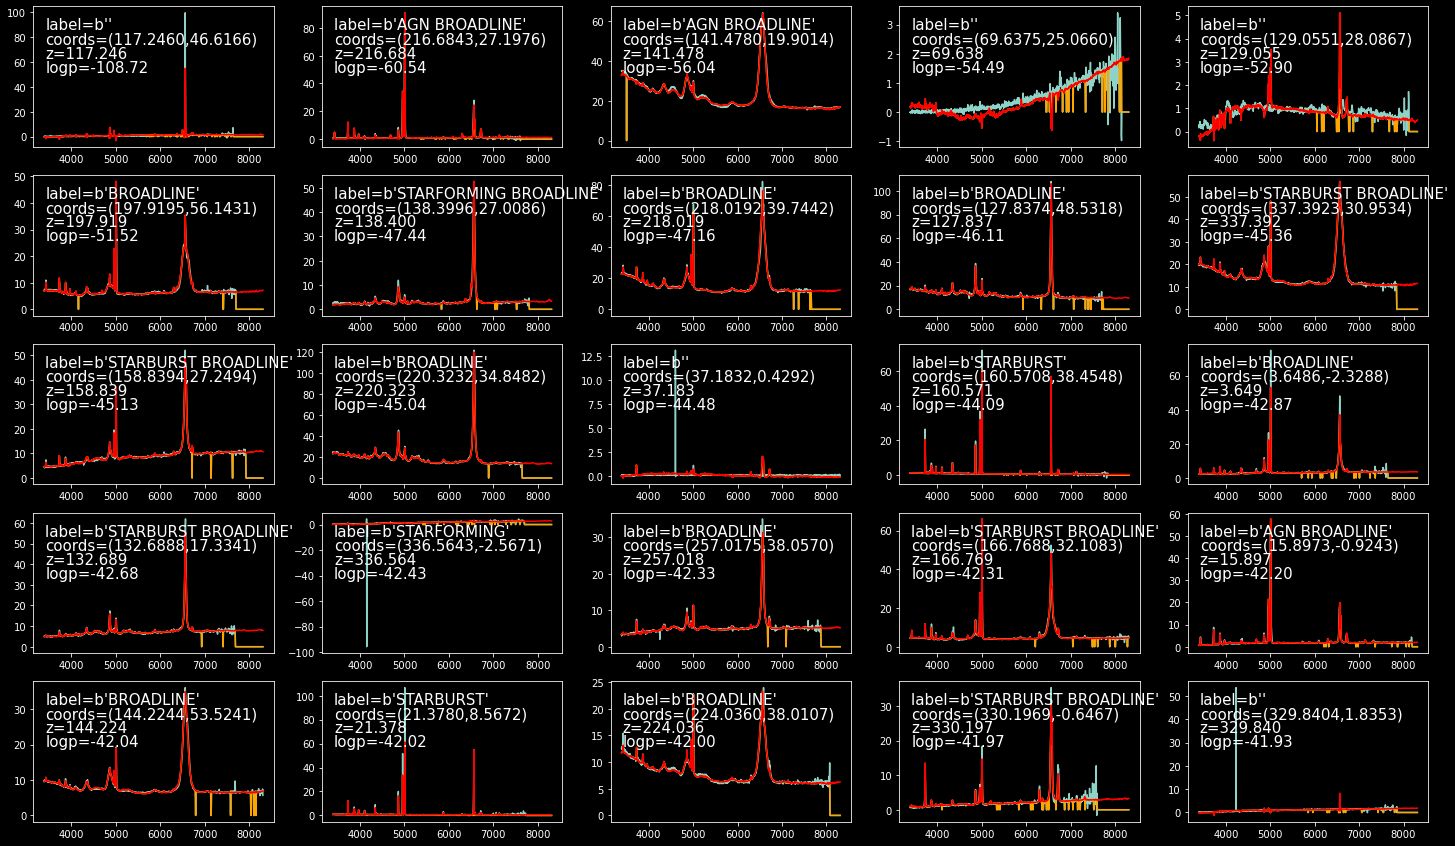

In [34]:
style_list=['dark_background']
# Plot a demonstration figure for every available style sheet.
for style_label in style_list:
    with plt.rc_context({"figure.max_open_warning": len(style_list)}):
        with plt.style.context(style_label):
            
            fig, ax = plt.subplots(5,5, figsize=(25,15))
            ax = ax.flatten()
            for nn, ii in enumerate(indices[0:25]):
                ax[nn].plot(new_wl[:-1], (np.squeeze(valid_data['arr_0'])[ii])*np.squeeze(valid_data['arr_1'])[ii], )
                ax[nn].plot(new_wl[:-1], (np.squeeze(decoded_valid)[ii])*np.squeeze(valid_data['arr_1'])[ii], color='orange')
                ax[nn].plot(new_wl[:-1], (np.squeeze(decoded_valid)[ii]), color='red')
                ax[nn].text(0.05, 0.92, r'label=%s'%valid_data['arr_7'][ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.82, r'coords=(%.4f,%.4f)'%(valid_data['arr_4'][ii],valid_data['arr_5'][ii]), fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.72, r'z=%.3f'%valid_data['arr_4'][ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.62, r'logp=%.2f'%logps_valid[ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)

plt.show()

In [ ]:
_ = plt.hist(logps_valid[:1000], bins=100)
#plt.show()

In [ ]:
# cluster by recon error

In [ ]:
logps_train = model.evaluate_density(encoded_train).cpu()

indices = np.argsort(logps_train)

style_list=['dark_background']
# Plot a demonstration figure for every available style sheet.
for style_label in style_list:
    with plt.rc_context({"figure.max_open_warning": len(style_list)}):
        with plt.style.context(style_label):
            
            fig, ax = plt.subplots(5,5, figsize=(25,15))
            ax = ax.flatten()
            for nn, ii in enumerate(indices[0:25]):
                ax[nn].plot(new_wl[:-1], (np.squeeze(train_data*std)[ii]+mean)*np.squeeze(train_mask)[ii], )
                ax[nn].plot(new_wl[:-1], (np.squeeze(decoded_train*std)[ii]+mean)*np.squeeze(train_mask)[ii], color='orange')
                ax[nn].plot(new_wl[:-1], np.squeeze(decoded_train*std)[ii]+mean, color='red')
                ax[nn].text(0.05, 0.92, r'z=%.2f'%train_params[ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)
                ax[nn].text(0.05, 0.82, r'logp=%.2f'%logps_train[ii], fontsize=15, color='white',verticalalignment='top', horizontalalignment='left', transform=ax[nn].transAxes)

plt.show()

In [ ]:
_ = plt.hist(logps_train, bins=100, density=True, log=True, cumulative=True)
